In [21]:
#Ref :  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb 

In [ ]:
#import standard libraries
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.12.0


# creating data to view & fit

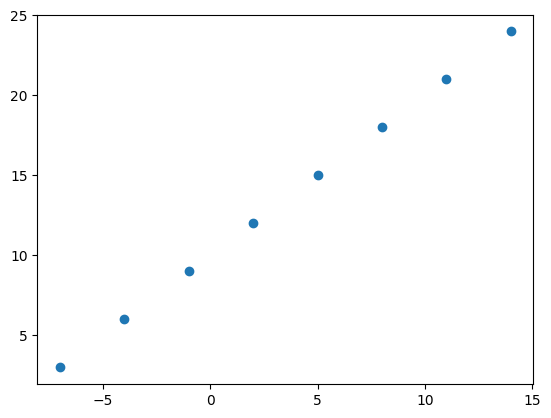

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize the data

plt.scatter(X , Y)


In [4]:
# observations from  data set
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# input and output shape

In [6]:
#create a demo tensor for our housing price prediction model

house_info = tf.constant(["bedroom" , "bathroom" , "garage"])
house_price = tf.constant([934000])

house_info , house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([934000])>)

In [6]:
input_shape = X.shape
output_shape = Y.shape

input_shape , output_shape

((8,), (8,))

In [5]:
X, Y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [6]:
X[0]  , Y[0]

(-7.0, 3.0)

In [4]:
#convert numpy arrays into tensors
X = tf.constant([-7., -4., -1.,  2.,  5.,  8., 11., 14.])
Y = tf.constant([ 3.,  6.,  9., 12., 15., 18., 21., 24.])
X  , Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [5]:
X.ndim  , Y.ndim

(1, 1)

In [9]:
X.dtype , Y.dtype

(tf.float32, tf.float32)

In [6]:
# converting dtype from float64 to float16 for better optimization in tensorflow
X = tf.cast(X, dtype= tf.float16)
Y = tf.cast(Y, dtype= tf.float16)

X.dtype  , Y.dtype

(tf.float16, tf.float16)

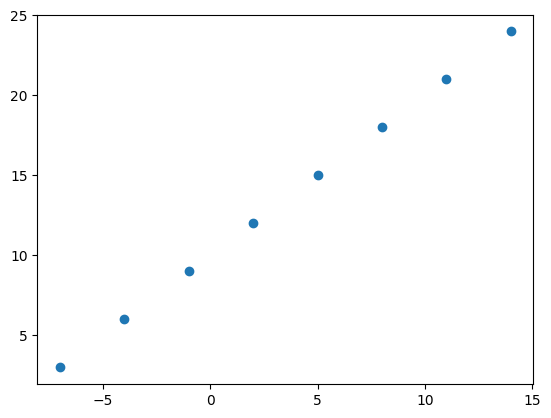

In [11]:
plt.scatter(X , Y)  # visualing the data

# Steps in modeling with TensorFlow

creating a model

compiling a model

fitting the model



1. Construct or import a pretrained model relevant to your problem.

2. Compile the model(prepare it to be used with data)

        Loss: how wrong you model's predictions are compared to the truth labels(you want to minimise this).

        Optimizer: how your model should update its internal patterns to better its predictions.

        Metrics: human interpretable values for how well your model is doing.

3. Fit the model to the training data so it can discover patterns

        Epochs: how many times the model will go through all of the training examples.
        
4. Evaluate the model on the test data(how reliable are our model's predictions).

In [15]:
# set random seed
tf.random.set_seed(42)

#creating model using Sequential API
model = tf.keras.Sequential([        # https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
    tf.keras.layers.Dense(1)
    ])

#compiling the model
model.compile(loss = tf.keras.losses.mae,   # mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
             )
#fit the model
model.fit(tf.expand_dims(X, axis=-1),Y,epochs=17)


Epoch 1/17
1/1 [==============================] - 0s 346ms/step - loss: 13.1933 - mae: 13.1933
Epoch 2/17
1/1 [==============================] - 0s 7ms/step - loss: 13.0608 - mae: 13.0608
Epoch 3/17
1/1 [==============================] - 0s 6ms/step - loss: 12.9283 - mae: 12.9283
Epoch 4/17
1/1 [==============================] - 0s 6ms/step - loss: 12.7958 - mae: 12.7958
Epoch 5/17
1/1 [==============================] - 0s 5ms/step - loss: 12.6633 - mae: 12.6633
Epoch 6/17
1/1 [==============================] - 0s 6ms/step - loss: 12.5308 - mae: 12.5308
Epoch 7/17
1/1 [==============================] - 0s 4ms/step - loss: 12.3983 - mae: 12.3983
Epoch 8/17
1/1 [==============================] - 0s 5ms/step - loss: 12.2658 - mae: 12.2658
Epoch 9/17
1/1 [==============================] - 0s 5ms/step - loss: 12.1333 - mae: 12.1333
Epoch 10/17
1/1 [==============================] - 0s 8ms/step - loss: 12.0008 - mae: 12.0008
Epoch 11/17
1/1 [==============================] - 0s 4ms/step - lo

In [16]:
#try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 57ms/step


array([[11.774583]], dtype=float32)

# Improving our model:

we can improve our model, by altering the steps we took to create a model.

1) Creating a model: here we might add more layers, increase the number of hidden units(called neurons) within each of the hidden layers, change the activation function of each layer.

2) Compiling a model: here we might change the optimization function or perhaps the learning rate of the optimization function

3) Fitting a model: here we might fit a model for more epochs(leave it training for longer) or on more data(give the model more examples to learn from).

# Common ways to improve a deep model:
adding layers

increase the number of hidden layers

changing activation function

changing/adding the learning rate (very important)

changing optimization function

fitting more data

fitting for longer(epochs)

#  Theory

In TF.Keras there are basically three-way we can define a neural network, namely

Sequential API

Functional API

Model Subclassing API

is the easiest way to implement but comes with certain limitations. For example, with this API, we can’t create a model that shares feature information with another layer except to its subsequent layer. In addition, multiple input and output are not possible to implement either.

Functional API does solve these issues greatly. A model like Inception or ResNet is feasible to implement in Functional API. But often deep learning researcher wants to have more control over every nuance of the network and on the training pipelines and that’s exactly what Model Subclassing API serves.

Model Sub-Classing is a fully customizable way to implement the feed-forward mechanism for the custom-designed deep neural network in an object-oriented fashion.

In [69]:
# set random seed
tf.random.set_seed(42)

#creating model using Sequential API
model = tf.keras.Sequential([     #  We can't build complex networks such as multi-input or multi-output networks using this API.
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

#fit the model
model.fit(tf.expand_dims(X,axis=-1), Y , epochs=27)

Epoch 1/27
1/1 [==============================] - 1s 1s/step - loss: 13.1088 - mae: 13.1088
Epoch 2/27
1/1 [==============================] - 0s 7ms/step - loss: 7.1466 - mae: 7.1466
Epoch 3/27
1/1 [==============================] - 0s 7ms/step - loss: 12.1570 - mae: 12.1570
Epoch 4/27
1/1 [==============================] - 0s 5ms/step - loss: 5.1022 - mae: 5.1022
Epoch 5/27
1/1 [==============================] - 0s 8ms/step - loss: 6.6224 - mae: 6.6224
Epoch 6/27
1/1 [==============================] - 0s 6ms/step - loss: 8.0591 - mae: 8.0591
Epoch 7/27
1/1 [==============================] - 0s 8ms/step - loss: 7.7109 - mae: 7.7109
Epoch 8/27
1/1 [==============================] - 0s 10ms/step - loss: 6.4503 - mae: 6.4503
Epoch 9/27
1/1 [==============================] - 0s 6ms/step - loss: 3.8356 - mae: 3.8356
Epoch 10/27
1/1 [==============================] - 0s 9ms/step - loss: 5.2584 - mae: 5.2584
Epoch 11/27
1/1 [==============================] - 0s 5ms/step - loss: 7.7987 - mae: 

In [74]:
model.predict([17.0])

1/1 [==============================] - 0s 151ms/step


array([[26.649143]], dtype=float32)

# Evaluating a model

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

Visualize, visualize, visualize
When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
The training of a model - how does a model perform while it learns?
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?
Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

# For bigger dataset

In [2]:

# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [3]:
# Make labels for the dataset (adhering to the same pattern as before)
Y = np.arange(-90, 110, 4)
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [82]:
# observations from the data set:
#     y = x + 10
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

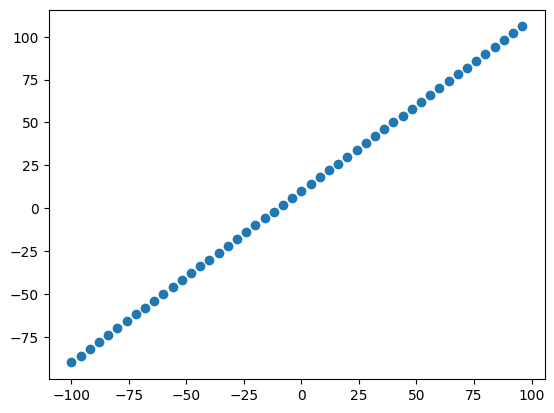

In [83]:
plt.scatter(X,Y)

In [84]:
len(X)

50

In [14]:
#splitting the data into train & test set

x_train1 = X[:40]
y_train1 = Y[:40]

x_test1 = X[40:]
y_test1 = Y[40:]

# here , we are taking full data set for training(bcoz of data set size & we know the pattern)
x_test1.shape

(10,)

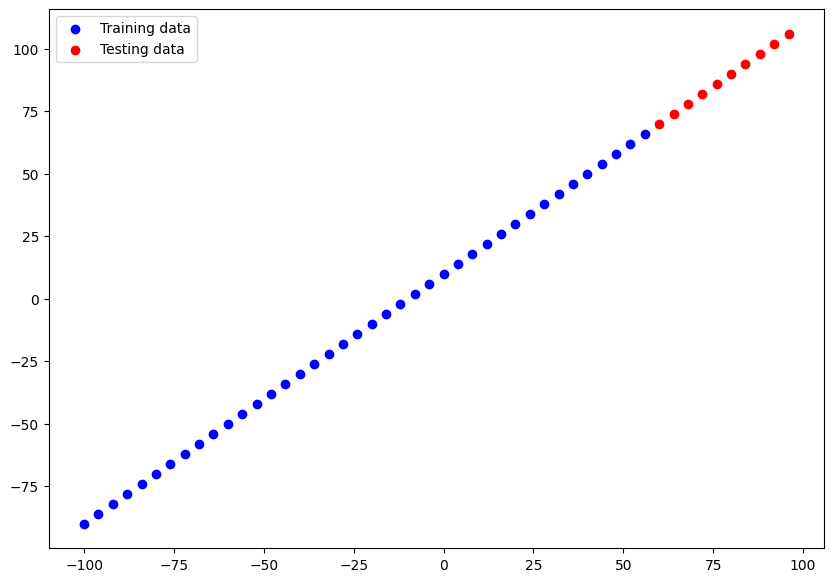

In [15]:
# visualizing the data sets(train,test)
plt.figure(figsize=(10, 7))
plt.scatter(x_train1 , y_train1 , c='b' , label="Training data")
plt.scatter(x_test1 , y_test1 , c='r',label="Testing data")
plt.legend()

In [16]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30 , input_shape=[1]) # define the input_shape to our model
])
#compile the model
model.compile(loss= tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics = ['mae'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                60        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


# Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.

Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

Learning Resource :  https://www.google.com/search?q=mit+introduction+to+deep+learning&rlz=1C1CHBF_enIN1003IN1003&oq=mit+introdu&aqs=chrome.0.0i512l3j69i57j0i512l6.3434j0j4&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:267ead53,vid:7sB052Pz0sQ

Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

In [18]:
#let's fit the model
model.fit(x_train1 , y_train1 , epochs=100, verbose=0) # verbose = 0 i.e. it don't show below logs(verbose=1)

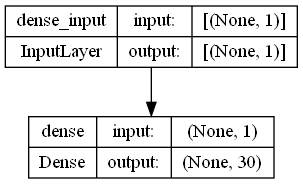

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model=model , show_shapes=True)

# Visualize the model predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

In [20]:
# making predictions
y_pred = model.predict(x_test1)

y_pred.shape

1/1 [==============================] - 0s 22ms/step


(10, 30)